In [1]:
import keras

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [3]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [4]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

- Dense 标准的一维全连接层

keras.layers.Dense(units, 
				  activation=None, 
				  use_bias=True, 
				  kernel_initializer='glorot_uniform', 
				  bias_initializer='zeros', 
				  kernel_regularizer=None, 
				  bias_regularizer=None, 
			    activity_regularizer=None, 
				  kernel_constraint=None, 
            bias_constraint=None)
以下给出Dense方法的使用示例：

keras.layers.Dense(512, activation= 'sigmoid', input_dim= 2, use_bias= True)
这里定义了一个有512个节点，使用sigmoid激活函数的神经层，注意定义第一层的时候需要制定数据输入的形状，即input_dim，这样才能让数据正常喂进网络

In [5]:
original_hist=original_model.fit(x_train,y_train,epochs=20,batch_size=512,validation_data=(x_test,y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 9s 374us/step - loss: 0.4440 - acc: 0.8251 - val_loss: 0.3286 - val_acc: 0.8835
Epoch 2/20
25000/25000 [==============================] - 11s 429us/step - loss: 0.2573 - acc: 0.9078 - val_loss: 0.2864 - val_acc: 0.8882
Epoch 3/20
25000/25000 [==============================] - 7s 296us/step - loss: 0.1991 - acc: 0.9294 - val_loss: 0.2822 - val_acc: 0.8891
Epoch 4/20
25000/25000 [==============================] - 7s 272us/step - loss: 0.1666 - acc: 0.9413 - val_loss: 0.2940 - val_acc: 0.8847
Epoch 5/20
25000/25000 [==============================] - 12s 476us/step - loss: 0.1434 - acc: 0.9498 - val_loss: 0.3115 - val_acc: 0.8807
Epoch 6/20
25000/25000 [==============================] - 18s 703us/step - loss: 0.1257 - acc: 0.9556 - val_loss: 0.3475 - val_acc: 0.8721
Epoch 7/20
25000/25000 [==============================] - 15s 617us/step - loss: 0.1110 - acc: 0.9618 - val_loss: 0.358

In [6]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 13s 511us/step - loss: 0.5804 - acc: 0.7027 - val_loss: 0.5309 - val_acc: 0.7558
Epoch 2/20
25000/25000 [==============================] - 7s 279us/step - loss: 0.4843 - acc: 0.8455 - val_loss: 0.4876 - val_acc: 0.8280
Epoch 3/20
25000/25000 [==============================] - 5s 208us/step - loss: 0.4389 - acc: 0.8920 - val_loss: 0.4663 - val_acc: 0.8497
Epoch 4/20
25000/25000 [==============================] - 5s 199us/step - loss: 0.4077 - acc: 0.9154 - val_loss: 0.4526 - val_acc: 0.8663
Epoch 5/20
25000/25000 [==============================] - 5s 197us/step - loss: 0.3832 - acc: 0.9304 - val_loss: 0.4514 - val_acc: 0.8621
Epoch 6/20
25000/25000 [==============================] - 5s 197us/step - loss: 0.3620 - acc: 0.9414 - val_loss: 0.4425 - val_acc: 0.8725
Epoch 7/20
25000/25000 [==============================] - 5s 200us/step - loss: 0.3425 - acc: 0.9517 - val_loss: 0.4495 -

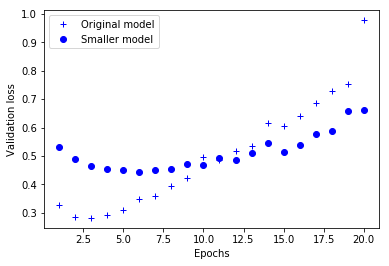

In [8]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


As you can see, the smaller network starts overfitting later than the reference one (after 6 epochs rather than 4) and its performance degrades much more slowly once it starts overfitting.

Now, for kicks, let's add to this benchmark a network that has much more capacity, far more than the problem would warrant:

Adding weight regularization
You may be familiar with Occam's Razor principle: given two explanations for something, the explanation most likely to be correct is the "simplest" one, the one that makes the least amount of assumptions. This also applies to the models learned by neural networks: given some training data and a network architecture, there are multiple sets of weights values (multiple models) that could explain the data, and simpler models are less likely to overfit than complex ones.

A "simple model" in this context is a model where the distribution of parameter values has less entropy (or a model with fewer parameters altogether, as we saw in the section above). Thus a common way to mitigate overfitting is to put constraints on the complexity of a network by forcing its weights to only take small values, which makes the distribution of weight values more "regular". This is called "weight regularization", and it is done by adding to the loss function of the network a cost associated with having large weights. This cost comes in two flavors:

L1 regularization, where the cost added is proportional to the absolute value of the weights coefficients (i.e. to what is called the "L1 norm" of the weights).
L2 regularization, where the cost added is proportional to the square of the value of the weights coefficients (i.e. to what is called the "L2 norm" of the weights). L2 regularization is also called weight decay in the context of neural networks. Don't let the different name confuse you: weight decay is mathematically the exact same as L2 regularization.
In Keras, weight regularization is added by passing weight regularizer instances to layers as keyword arguments. Let's add L2 weight regularization to our movie review classification network:

In [9]:
from keras import regularizers

l2_model=models.Sequential()
l2_model.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.001),activation='relu',input_shape=(10000,)))
l2_model.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.001),activation='relu'))
l2_model.add(layers.Dense(1,activation='sigmoid'))

In [10]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 7s 268us/step - loss: 0.5041 - acc: 0.8084 - val_loss: 0.3782 - val_acc: 0.8838
Epoch 2/20
25000/25000 [==============================] - 6s 229us/step - loss: 0.3131 - acc: 0.9066 - val_loss: 0.3327 - val_acc: 0.8897
Epoch 3/20
25000/25000 [==============================] - 6s 236us/step - loss: 0.2665 - acc: 0.9220 - val_loss: 0.3681 - val_acc: 0.8700
Epoch 4/20
25000/25000 [==============================] - 6s 223us/step - loss: 0.2481 - acc: 0.9288 - val_loss: 0.3386 - val_acc: 0.8863
Epoch 5/20
25000/25000 [==============================] - 5s 217us/step - loss: 0.2354 - acc: 0.9354 - val_loss: 0.3803 - val_acc: 0.8694
Epoch 6/20
25000/25000 [==============================] - 5s 204us/step - loss: 0.2248 - acc: 0.9394 - val_loss: 0.3589 - val_acc: 0.8797
Epoch 7/20
25000/25000 [==============================] - 6s 229us/step - loss: 0.2174 - acc: 0.9428 - val_loss: 0.3788 - 

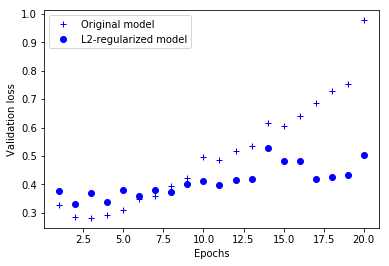

In [11]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

# Dropout
- The dropout rate is the fractio of the features that are being zeroed-out; it is usually set between 0.2 and 0.5.
Dropout是由Srivastava等人在2014年的一篇论文中提出的一种针对神经网络模型的正则化方法“Dropout: A Simple Way to Prevent Neural Networks from Overfitting”（下载PDF）。

Dropout是在训练期间随机选择的一些神经元忽略的技术。他们随机“Dropout”。这意味着它们对下游神经元的激活的贡献暂时消除，并且在反向过程没有实施任何权重的更新。

每轮权重更新，以给定的概率(例如20%)从随机选择的节点中舍弃，这个过程很容易实现。这就是在Keras中实现Dropout。Dropout仅在训练模型时使用，在评估模型的技能时不使用。

http://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf


In [12]:
layer_output *=np.randint(0,high=2,size=layer_output.shape)


NameError: name 'layer_output' is not defined

In [13]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [14]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 26s 1ms/step - loss: 0.5573 - acc: 0.7182 - val_loss: 0.4038 - val_acc: 0.8624
Epoch 2/20
25000/25000 [==============================] - 14s 547us/step - loss: 0.3982 - acc: 0.8452 - val_loss: 0.3092 - val_acc: 0.8857
Epoch 3/20
25000/25000 [==============================] - 8s 326us/step - loss: 0.3272 - acc: 0.8844 - val_loss: 0.2868 - val_acc: 0.8894
Epoch 4/20
25000/25000 [==============================] - 6s 259us/step - loss: 0.2758 - acc: 0.9056 - val_loss: 0.2796 - val_acc: 0.8877
Epoch 5/20
25000/25000 [==============================] - 6s 242us/step - loss: 0.2433 - acc: 0.9204 - val_loss: 0.2886 - val_acc: 0.8886
Epoch 6/20
25000/25000 [==============================] - 6s 243us/step - loss: 0.2189 - acc: 0.9286 - val_loss: 0.3046 - val_acc: 0.8811
Epoch 7/20
25000/25000 [==============================] - 6s 229us/step - loss: 0.1951 - acc: 0.9370 - val_loss: 0.3227 - 